In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#- age
#- sex
#- chest pain type (4 values)
#— Value 0: typical angina
#— Value 1: atypical angina
#— Value 2: non-anginal pain
#— Value 3: asymptomatic
#- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#- chol: serum cholestoral in mg/dl
#- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#- restecg: resting electrocardiographic results
#— Value 0: normal
#— Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#— Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
#- thalach: maximum heart rate achieved
#- exang: exercise induced angina (1 = yes; 0 = no)
#- oldpeak = ST depression induced by exercise relative to rest
#- slope: the slope of the peak exercise ST segment
#— Value 1: up-sloping
#— Value 2: flat
#— Value 3: down-sloping
#- ca: number of major vessels (0–3) colored by fluoroscope
#- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

In [2]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [3]:
data_dup = data.duplicated().any()
data_dup

True

In [4]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

In [5]:
#categorical values
#numerical values
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
cate_val     #categorical values

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [6]:
cont_val  #numerical values

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [7]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [8]:
cate_val.remove('sex')
data = pd.get_dummies(data,columns = cate_val,drop_first=True) #avoid prediction of variables from others
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,63,1,145,233,150,2.3,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,1,130,250,187,3.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,0,130,204,172,1.4,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,1,120,236,178,0.8,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,0,120,354,163,0.6,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [10]:
X = data.drop('sex',axis=1)
y = data['sex']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)
y_test

180    1
229    1
111    1
247    1
60     0
      ..
250    1
104    1
300    1
194    1
185    1
Name: sex, Length: 61, dtype: int64

In [11]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [12]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7540983606557377

In [14]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [15]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8360655737704918

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7704918032786885

In [18]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
score

C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

[0.6229508196721312,
 0.5573770491803278,
 0.7049180327868853,
 0.5573770491803278,
 0.7704918032786885,
 0.7377049180327869,
 0.8032786885245902,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.819672131147541,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7868852459016393,
 0.7704918032786885,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.819672131147541,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426]

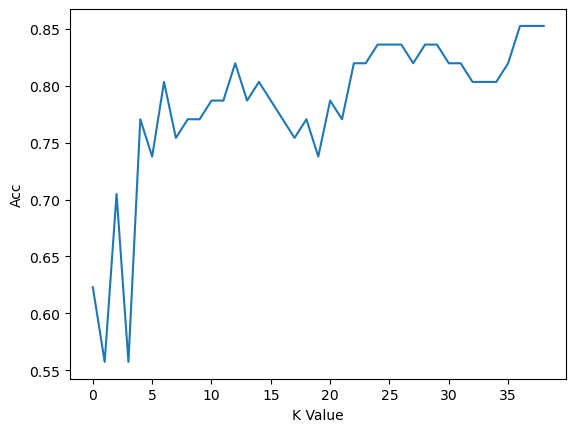

In [19]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [20]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5573770491803278

In [22]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()
X = data.drop('sex',axis=1)
y=data['sex']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.639344262295082

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [28]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.7704918032786885

In [29]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})
final_data

,Models,ACC
0,LR,75.409836
1,SVM,83.606557
2,KNN,77.049180
3,DT,63.934426
4,RF,83.606557
5,GB,77.049180


C:\Users\virupaksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

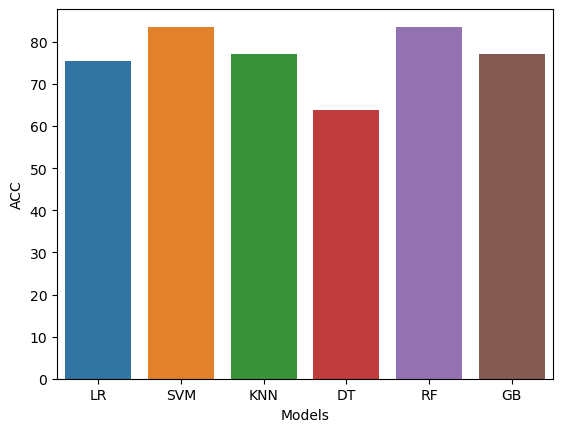

In [30]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [32]:
import pandas as pd
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [33]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

Disease


C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- sex
- slope
- thal
- ...
Feature names seen at fit time, yet now missing:
- caa
- exng
- output
- slp
- thalachh
- ...

  warnings.warn(message, FutureWarning)


In [34]:
import joblib
joblib.dump(rf,'model_joblib_heart') 

['model_joblib_heart']

In [35]:
model = joblib.load('model_joblib_heart')
model.predict(new_data)

C:\Users\virupaksha\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- sex
- slope
- thal
- ...
Feature names seen at fit time, yet now missing:
- caa
- exng
- output
- slp
- thalachh
- ...

  warnings.warn(message, FutureWarning)


array([1], dtype=int64)

In [36]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [38]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()